<a href="https://colab.research.google.com/github/git-bauerseb/deep-learning/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf

import cProfile

tf.executing_eagerly()

True

In [ ]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels, tf.int64)
     ))

dataset = dataset.shuffle(1000).batch(32)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu',
                                                          input_shape=(None, None, 1)),
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
                                   tf.keras.layers.GlobalAveragePooling2D(),
                                   tf.keras.layers.Dense(10)
])

In [ ]:
mnist_model.summary()

# Logit: Values used as input to softmax


for images, labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 16)    160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________
Logits:  [[ 0.01237769 -0.01763933 -0.01586457 -0.01711813 -0.01231478 -0.00134613
   0.02269121 -0.04868368 -0.03317571  0.00764141]]


In [ ]:
# Keras models have builtin training loop ('fit' method)
# More customization

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

def train_step(images, labels):
  # Use to inspect computes gradients
  with tf.GradientTape() as tape:
      logits = mnist_model(images, training=True)

      tf.debugging.assert_equal(logits.shape, (32,10))

      loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))


def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)

    print('Epoch {} finished'.format(epoch))

train(epochs=3)

Epoch 0 finished
Epoch 1 finished


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt


plt.plot(loss_history)
plt.xlabel("Batch #")
plt.ylabel("Loss [Entropy]")

In [ ]:
# Short

x = tf.ones((2,2))

with tf.GradientTape(persistent=True) as t:
  t.watch(x)

  y = tf.reduce_sum(x)
  z = tf.multiply(y,y)


dz_dx = t.gradient(z,x)
dz_dy = t.gradient(z,y)
print(dz_dy)
print(dz_dx)


del t

In [ ]:
####################
# START HERE
import os
import tensorflow as tf
import cProfile

tf.executing_eagerly()

x = [[2.]]
m = tf.matmul(x,x)
print(m)

In [ ]:
x = [[2., 3.]]
y = [[1.], [4.]]

a = tf.constant([[1,2], [3,4]])

print(tf.matmul(x,y))
print(a)

b = tf.add(a,1)
print(b)

c = a + 1
print(c)

# Overloading
print(a*b)

# Obtain numpy value from tensor
print(a.numpy())

def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)

  for num in range(1, max_num.numpy() + 1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int (num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

fizzbuzz(15)

In [ ]:
w = tf.Variable([[1.]])
print(w)

with tf.GradientTape() as tape:
  loss = w*w

grad = tape.gradient(loss, w)
print(grad)

In [ ]:
# Train model
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    
  (tf.cast(mnist_images[...,tf.newaxis] / 255, tf.float32),
   tf.cast(mnist_labels, tf.int64)
   ))

dataset = dataset.shuffle(1000).batch(32)



In [ ]:
mnist_model = tf.keras.Sequential([
                                   
  tf.keras.layers.Conv2D(16, [3,3], activation='relu', input_shape=(None, None,1)),
  tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

for images,labels in dataset.take(1):
  print(mnist_model(images[0:1]).numpy())

In [ ]:
#################################
# Diven into Deep Learning
#################################

!pip install d2l

In [ ]:
#################################
# Diven into Deep Learning
#################################


######
# Ch 2
######

# 2.1

x = tf.range(12)
x

print(x.shape)
print(tf.size(x))

# -1 --> Automatically calculates dimnension
x = tf.reshape(x, (3,-1))
print(x)

print(tf.zeros((2,3,4)))
print(tf.ones((2,3,4)))


# Each element is randomly sampled from standard Gaussian (mean 0; stddev 1)
print(tf.random.normal(shape=[3,4]))


# Elementwise operations
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])

print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x**y)

(12,)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)
tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(2, 3, 4), dtype=float32)
tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 3, 4), dtype=float32)
tf.Tensor(
[[-0.23254426 -0.5098168  -0.5362121   1.0317144 ]
 [ 0.84674484  0.8564519  -1.0790622  -3.085262  ]
 [-0.49880284  0.47253412  0.5381207  -0.16567378]], shape=(3, 4), dtype=float32)
tf.Tensor([ 3.  4.  6. 10.], shape=(4,), dtype=float32)
tf.Tensor([-1.  0.  2.  6.], shape=(4,), dtype=float32)
tf.Tensor([ 2.  4.  8. 16.], shape=(4,), dtype=float32)
tf.Tensor([0.5 1.  2.  4. ], shape=(4,), dtype=float32)
tf.Tensor([ 1.  4. 16. 64.], shape=(4,), dtype=float32)


In [ ]:
# Concat tensors

X = tf.reshape(tf.range(12, dtype=tf.float32), (3,4))
Y = tf.constant([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype=tf.float32)

C1 = tf.concat([X,Y], axis=0)
print(X)
print(Y)
print(C1)

# Logical elementwise operation
print(X == Y)

# Sum all elements up
print(tf.reduce_sum(X))

tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [ 2.  1.  4.  3.]
 [ 1.  2.  3.  4.]
 [ 4.  3.  2.  1.]], shape=(6, 4), dtype=float32)
tf.Tensor(
[[False  True False  True]
 [False False False False]
 [False False False False]], shape=(3, 4), dtype=bool)
tf.Tensor(66.0, shape=(), dtype=float32)


In [ ]:
# Apply elementwise operation on tensors of different size
a = tf.reshape(tf.range(3), (3,1))
b = tf.reshape(tf.range(2), (1,2))

print(a)
print(b)
print(a+b)

tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int32)
tf.Tensor([[0 1]], shape=(1, 2), dtype=int32)
tf.Tensor(
[[0 1]
 [1 2]
 [2 3]], shape=(3, 2), dtype=int32)


In [ ]:
# Indexing

# Tensors are immutable -> Create separate variable
X = tf.random.normal(shape=(4,4))
X_var = tf.Variable(X)
X_var[::2, :].assign(tf.zeros(X_var[::2,:].shape, dtype=tf.float32))
print(X_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.26876625, -0.4587332 , -0.4774071 ,  0.48749694],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.40161186,  0.60465676,  0.04616211, -0.97432953]],
      dtype=float32)>


In [ ]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3,4))
Y = tf.constant([[2,1,4,3], [1,2,3,4], [4,3,2,1]], dtype=tf.float32)

before = id(Y)
Y = Y + X
id(Y) == before

Z = tf.Variable(tf.zeros_like(Y))
print('id(Z):', id(Z))
print('id(Z):', id(Z))

# tf.function decorator to wrap computation inside of TensorFlow graph
@tf.function
def computation(X,Y):
  Z = tf.zeros_like(Y)
  A = X + Y     # Allocations will be reused
  B = A + Y
  C = B + Y
  return C + Y

computation(X,Y)

id(Z): 139788254854224
id(Z): 139788254854224


<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 8.,  9., 26., 27.],
       [24., 33., 42., 51.],
       [56., 57., 58., 59.]], dtype=float32)>

In [ ]:
A = X.numpy()
B = tf.constant(A)
print(type(A))
print(type(B))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# 2.2 - Data Preprocessing

import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
  f.write('NumRooms, Alley, Price\n')
  f.write('NA, Pave, 127500\n')
  f.write('2, NA, 106000\n')
  f.write('4, NA, 178100\n')
  f.write('NA, NA, 140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms  Alley   Price
0       NaN   Pave  127500
1       2.0     NA  106000
2       4.0     NA  178100
3       NaN     NA  140000


In [ ]:
import numpy as np

inputs, outputs = data.iloc[:, 0:2], data.iloc[:,2]

notNAValMatrix = np.array(inputs.notna())


max = np.max(np.sum(notNAValMatrix + 0, axis=1))

filtered = inputs.dropna(thresh=max)

print(filtered)

# Fill missing inputs by average of available data points
inputs = inputs.fillna(inputs.mean())
print(inputs)

inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

# All values are numeric --> can be converted to tensors

X, y = tf.constant(inputs.values), tf.constant(outputs)
X,y

   NumRooms  Alley
1       2.0     NA
2       4.0     NA
   NumRooms  Alley
0       3.0   Pave
1       2.0     NA
2       4.0     NA
3       3.0     NA
   NumRooms   Alley_ NA   Alley_ Pave   Alley_nan
0       3.0           0             1           0
1       2.0           1             0           0
2       4.0           1             0           0
3       3.0           1             0           0


(<tf.Tensor: shape=(4, 4), dtype=float64, numpy=
 array([[3., 0., 1., 0.],
        [2., 1., 0., 0.],
        [4., 1., 0., 0.],
        [3., 1., 0., 0.]])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([127500, 106000, 178100, 140000])>)

In [ ]:
# 2.3 Linear Algebra
import tensorflow as tf

## Scalars
x = tf.constant(3.0)
print(x)

## Matrices

A = tf.reshape(tf.range(20), (5,4))
print(A)

print(tf.transpose(A))

### Symmetric matrix
B = tf.constant([[1,2,3],[2,0,4], [3,4,5]])
print(B == tf.transpose(B))


## Tensors
X = tf.reshape(tf.range(24), (2,3,4))
print(X)

tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]], shape=(5, 4), dtype=int32)
tf.Tensor(
[[ 0  4  8 12 16]
 [ 1  5  9 13 17]
 [ 2  6 10 14 18]
 [ 3  7 11 15 19]], shape=(4, 5), dtype=int32)
tf.Tensor(
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]], shape=(3, 3), dtype=bool)
tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]], shape=(2, 3, 4), dtype=int32)


In [ ]:
print(tf.transpose(X))


### Hadamard product
A = tf.reshape(tf.range(20, dtype=tf.float32), (5,4))
B = A

A * B

### Multiply by scalar
a = 2
print(X.shape)
print((a*X).shape)

### Reductions

#### Sum
A = tf.reshape(tf.range(20), (5,4))
print(A,tf.reduce_sum(A, axis=0))

# Keep axes after reduction
A = tf.reshape(tf.range(20), (5,4))
sum_A = tf.reduce_sum(A, axis=1, keepdims=True)
print(A / sum_A)
print(tf.reduce_sum(A / sum_A))

#### Mean
N = tf.random.normal(shape=(700,700))
print(tf.reduce_mean(N))

#### Cumulative sum
print(tf.cumsum(A, axis=0))

tf.Tensor(
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]], shape=(4, 3, 2), dtype=int32)
(2, 3, 4)
(2, 3, 4)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]], shape=(5, 4), dtype=int32) tf.Tensor([40 45 50 55], shape=(4,), dtype=int32)
tf.Tensor(
[[0.         0.16666667 0.33333333 0.5       ]
 [0.18181818 0.22727273 0.27272727 0.31818182]
 [0.21052632 0.23684211 0.26315789 0.28947368]
 [0.22222222 0.24074074 0.25925926 0.27777778]
 [0.22857143 0.24285714 0.25714286 0.27142857]], shape=(5, 4), dtype=float64)
tf.Tensor(5.0, shape=(), dtype=float64)
tf.Tensor(-0.00048732737, shape=(), dtype=float32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]
 [40 45 50 55]], shape=(5, 4), dtype=int32)


In [ ]:
### Dot product
y = tf.ones(4, dtype=tf.float32)
print(tf.tensordot(x,y,axes=1))

A = tf.reshape(tf.range(20), (5,4))
B = tf.reshape(tf.range(20), (4,5))

print(A)
print(B)
print(tf.tensordot(A,B, axes=0))

ValueError: ignored

In [ ]:
### Norms

#### L2 norm by standard
u = tf.constant([3.0, -4.0])
print(tf.norm(u))

#### L1 norm
print(tf.reduce_sum(tf.abs(u)))

#### Frobenius norm (matrix)


In [ ]:
## 2.4 Calculus
!pip install d2l
%matplotlib inline

import numpy as np
from IPython import display
from d2l import tensorflow as d2l

def f(x):
  return 3 * x ** 2 - 4 * x

def numerical_lim(f,x,h):
  return (f(x+h) - f(x)) / h

h = 0.1
for i in range(5):
  print(numerical_lim(f,1,h))
  h *= 0.1

In [ ]:
from IPython import display
import numpy as np
from d2l import tensorflow as d2l

# Specifices to use svg figures
def use_svg_display():
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# For plotting mutliple curves
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear',
        yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
  if legend is None:
    legend = []

  set_figsize(figsize)
  axes = axes if axes else d2l.plt.gca()

  def has_one_axis(X):
      return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], '__len__'))

  if has_one_axis(X):
    X = [X]
  if Y is None:
      X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()

  for x,y, fmt in zip(X,Y,fmts):
    if len(x):
      axes.plot(x,y,fmt)
    else:
      axes.plot(y,fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)



x = np.arange(0,3,0.1)

def f(x):
  return 3 * x ** 2 - 4 * x 

plot(x, [f(x), 2*x-3], 'x', 'f(x)', legend=['f(x)', 'Tagent line'])

In [ ]:
## 2.5 Automatic Differentiation

import tensorflow as tf

x = tf.range(4, dtype=tf.float32)
print(x)

x = tf.Variable(x)

with tf.GradientTape() as t:
  y = 2 * tf.tensordot(x,x, axes=1)

x_grad = t.gradient(y,x)
x_grad

### Backward for Non-Scalar Variables

with tf.GradientTape() as t:
  y = x * x

t.gradient(y,x)

tf.Tensor([0. 1. 2. 3.], shape=(4,), dtype=float32)


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>

In [ ]:
with tf.GradientTape(persistent=True) as t:
  y = x * x
  u = tf.stop_gradient(y)
  z = u * x

x_grad = t.gradient(z,x)


# Calculate Gradient of Control Flow
def f(a):
  b = a * 2
  while tf.norm(b) < 1000:
    b = b * 2
  if tf.reduce_sum(b) > 0:
    c = b
  else:
    c = 100 * b
  return c

a = tf.Variable(tf.random.normal(shape=()))
with tf.GradientTape() as t:
  d = f(a)

d_grad = t.gradient(d,a)
d_grad


### Exercises

# 5


<tf.Tensor: shape=(), dtype=float32, numpy=102400.0>

In [ ]:
## 2.6 Probability
!pip install d2l
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

In [ ]:
fair_probs = tf.ones(6) / 6

# Sample 10 times from multinomial distribution with given probs
tfp.distributions.Multinomial(10, fair_probs).sample()

counts = tfp.distributions.Multinomial(1000, fair_probs).sample()
counts / 1000

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.172, 0.169, 0.175, 0.156, 0.163, 0.165], dtype=float32)>

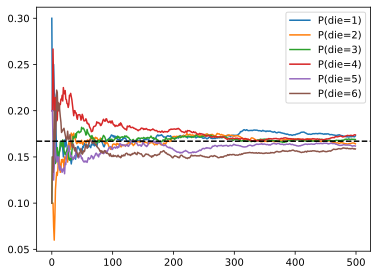

In [ ]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)

cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((6,4.5))

for i in range(6):
  d2l.plt.plot(estimates[:,i].numpy(), label=('P(die=' + str(i+1) + ')'))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')

d2l.plt.legend()

## Bayes rule

$$
  P(A,B) = P(B|A)P(A) \quad \text{and}, \\
  P(A,B) = P(A|B)P(B) \\
  \iff P(A|B) = \frac{P(A,B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)}
$$

In [ ]:
## 2.7 Documentation

import tensorflow as tf

# Lists available functions/classes in tf.random module
print(dir(tf.random))

# Prints instructions on how to use function/class
help(tf.ones)

# For Jupyter
# list?

# Python code will be displayed
list??

['Algorithm', 'Generator', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'all_candidate_sampler', 'categorical', 'create_rng_state', 'experimental', 'fixed_unigram_candidate_sampler', 'gamma', 'get_global_generator', 'learned_unigram_candidate_sampler', 'log_uniform_candidate_sampler', 'normal', 'poisson', 'set_global_generator', 'set_seed', 'shuffle', 'stateless_binomial', 'stateless_categorical', 'stateless_gamma', 'stateless_normal', 'stateless_parameterized_truncated_normal', 'stateless_poisson', 'stateless_truncated_normal', 'stateless_uniform', 'truncated_normal', 'uniform', 'uniform_candidate_sampler']
Help on function ones in module tensorflow.python.ops.array_ops:

ones(shape, dtype=tf.float32, name=None)
    Creates a tensor with all elements set to one (1).
    
    See also `tf.ones_like`, `tf.zeros`, `tf.fill`, `tf.eye`.
    
    This operation returns a tensor of type `dtype` with shape `shape

In [ ]:
# 3 - Linear Neural Networks

# 3.1 Linear Model

- Before thinking how to fit dat --> quality measure
  - --> loss function

  Squared error loss for example i:
  $$
    l^{i}(\mathbf{w}, b) = \frac{1}{2} ( \hat{y}^{(i)} - y^{(i)} )
    ^{2}
  $$

- For lineare regression --> closed form solution exists

  $$
    w^{*} = (\mathbf{X}^{\top}\mathbf{X})^{-1} \mathbf{X}^{\top} \mathbf{y}
  $$


### Minibatch Stochastic Gradient Descent

- Update parameters in direction that incrementally lowers loss function
  -> **gradient descent**

- single example gradient descent often slow
  -> use randomly sampled minibatch **minibatch stochastic gradient descent**

  $$
    (\mathbf{w}, b) \gets (\mathbf{w}, b) - \frac{\alpha}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial}{\partial \mathbf{w},b} l^{(i)} (\mathbf{w}, b)
  $$

- $\alpha$ is called **learning rate**

In [ ]:
!pip install d2l
%matplotlib inline
import math
import time
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
class Timer: 
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

In [ ]:
n = 10_000

a = tf.ones(n)
b = tf.ones(n)

c = tf.Variable(tf.zeros(n))

timer = Timer()
for i in range(n):
  c[i].assign(a[i] + b[i])

f'{timer.stop():.5f}sec'

'5.91108sec'

In [ ]:
timer.start()
d = a + b
f'{timer.stop():.5f}sec'

'0.00023sec'

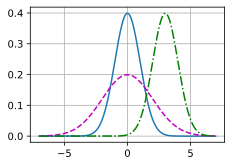

In [ ]:
def normal(x,mu,sigma):
  p = 1 / math.sqrt(2 * math.pi * sigma**2)
  return p * np.exp(-.5 /sigma**2 * (x-mu)**2)

x = np.arange(-7,7,0.01)

params = [(0,1), (0,2), (3,1)]

d2l.plot(x, [normal(x,mu,sigma) for mu, sigma in params])

- Use of gauss distribution in linear regression:

- observations usually are noisy
$$
  y = \mathbf{w}^{\top} \mathbf{x} + b + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$

- then likelihood is:

$$
  P(y | \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp ( {-\frac{1}{2 \sigma^2} (y - \mathbf{w}^{\top} \mathbf{x} - b)^2 )}
$$

**Equivalent**: Minimizing squared error is equivalent to maximum likelihood estimation


- linear regression -> special type of fully-connected neural network with 1 layer

In [ ]:
# 3.2 Linear Regression Implementation from Scratch

# Example lin. regr.
# - 2 features, 1000 examples
# X in R^{1000x2}

# !pip install d2l
%matplotlib inline
import random
import tensorflow as tf


def synthetic_data(w,b,num):
  # Generate feature matrix
  X = tf.zeros((num, w.shape[0]))
  X += tf.random.normal(shape=X.shape)

  # Generate labels
  y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
  y += tf.random.normal(shape=y.shape, stddev=.01)
  y = tf.reshape(y, (-1, 1))

  return X, y

true_w = tf.constant([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

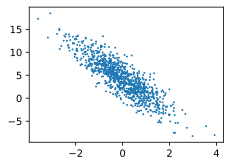

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [ ]:
def data_iter(batch_size, features, labels):
  '''
    Yields minibatches of the size batch_size. Each minibatch
    is a tuple of features and labels
  '''
  num_examples = len(features)
  indices = list(range(num_examples))

  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = tf.constant(indices[i:min(i+batch_size, num_examples)])
    yield tf.gather(features, j), tf.gather(labels, j)


batch_size = 13

for X,y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tf.Tensor(
[[-1.515911   -0.30509022]
 [ 0.13607341  0.8677985 ]
 [-0.20826751  0.16241933]
 [ 1.1370695  -0.49236077]
 [ 2.183293   -0.7666597 ]
 [ 2.9004107   1.3445992 ]
 [ 1.0641233   0.5997038 ]
 [-0.32943532  1.4770015 ]
 [ 0.09525593 -0.44388247]
 [-1.7740146  -0.739555  ]
 [-0.46486732  0.823141  ]
 [-0.02959703 -0.89119095]
 [ 1.9331142   0.49700865]], shape=(13, 2), dtype=float32) 
 tf.Tensor(
[[ 2.2061987 ]
 [ 1.5194178 ]
 [ 3.2452219 ]
 [ 8.137061  ]
 [11.16216   ]
 [ 5.4153175 ]
 [ 4.2780704 ]
 [-1.4735339 ]
 [ 5.894245  ]
 [ 3.1793504 ]
 [ 0.47407767]
 [ 7.1687684 ]
 [ 6.3733597 ]], shape=(13, 1), dtype=float32)


In [ ]:
### Initialize Model Parameters
w = tf.Variable(tf.random.normal(shape=(2,1), mean=0, stddev=.01), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)


### Defining the Model
def linreg(X, w, b):
  return tf.matmul(X,w) + b


### Defining the Loss Function
def squared_loss(y_hat, y):
  if (y.shape != y_hat.shape):
    print(y.shape)
    print(y_hat.shap)
  return .5 * (y_hat - tf.reshape(y,y_hat.shape))**2


### Defining Optimization Algorithm
def sgd(params, grads, lr, batch_size):
  for param, grad in zip(params, grads):
    param.assign_sub(lr * grad / batch_size)


### Training

- each iteration:
  - grab minibatch of training examples
  - pass through model to obtain a set of predictions
  - calculate loss
  - backwards pass through network:
    - storing gradients with respect to each parameter
    - use **stochastic gradient descent** to update model parameters

- gradient computation:

$$
\mathbf{g} \gets \partial{}_{\mathbf{w}, b} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} loss 
$$

Each **epoch**: iterate through entire dataset

In [ ]:
# Learning rate
lr = .03
num_epochs = 3
net = linreg
loss = squared_loss

# Iterate 'num_epochs' times through dataset
for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    with tf.GradientTape() as g:
      # Compute loss
      l = loss(net(X,w,b), y)

    # Compute gradient with respect to weights and bias
    dw, db = g.gradient(l, [w,b])

    # Make gradient descent step
    sgd([w,b], [dw, db], lr, batch_size)

  train_l = loss(net(features, w, b), labels)
  print(f'Epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

Epoch 1, loss 0.135094
Epoch 2, loss 0.001147
Epoch 3, loss 0.000059


In [ ]:
# Use trained model to compare learned weights with original weights
print(f'Error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'Error in estimating b: {true_b - b}')

Error in estimating w: [ 0.00208986 -0.0012095 ]
Error in estimating b: [0.0032196]


In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [ ]:
## 3.3 Concise Implementation of Linear Regression

!pip install d2l

import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

# Loading data with batch size
def load_array(data_arrays, batch_size, is_train=True):
  dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
  if is_train:
    dataset = dataset.shuffle(buffer_size=1000)
  dataset = dataset.batch(batch_size)
  return dataset


batch_size = 10
data_iter = load_array((features, labels), batch_size)



<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float32, tf.float32)>


In [ ]:
next(iter(data_iter))

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[-0.16457567,  0.31776628],
        [-0.5222442 ,  1.7461387 ],
        [-0.538058  ,  0.95172197],
        [ 0.16523379, -0.4295269 ],
        [-1.8007338 , -0.42857102],
        [ 1.1146723 ,  0.69201326],
        [-0.31180868,  0.93335783],
        [-0.49712104,  0.53845054],
        [-0.28231272,  0.3480117 ],
        [-1.2509508 ,  1.7886525 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 2.8176742 ],
        [-2.7861326 ],
        [-0.1186237 ],
        [ 5.9924364 ],
        [ 2.0377796 ],
        [ 4.0665436 ],
        [ 0.41025537],
        [ 1.3717076 ],
        [ 2.451804  ],
        [-4.3917985 ]], dtype=float32)>)

In [ ]:
### Defining the Model

net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))

In [ ]:
### Init model parameters

initializer = tf.initializers.RandomNormal(stddev=.01)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))


### Defining loss
loss = tf.keras.losses.MeanSquaredError()

### Defining the Optimization Algorithm
trainer = tf.keras.optimizers.SGD(learning_rate=.03)

### Training
num_epochs = 8
for epoch in range(num_epochs):
  for X,y in data_iter:
    with tf.GradientTape() as tape:
      # Run prediction
      l = loss(net(X, training=True), y)

    # Compute gradient
    grads = tape.gradient(l, net.trainable_variables)
    trainer.apply_gradients(zip(grads, net.trainable_variables))
  l = loss(net(features), labels)
  print(f'Epoch {epoch + 1}, loss {l:f}')


# Compare weights with true values
w = net.get_weights()[0]
b = net.get_weights()[1]
print(true_w - tf.reshape(w, true_w.shape))
print(true_b - b)

Epoch 1, loss 2.263308
Epoch 2, loss 0.299820
Epoch 3, loss 0.000577
Epoch 4, loss 0.000049
Epoch 5, loss 0.000049
Epoch 6, loss 0.000049
Epoch 7, loss 0.000049
Epoch 8, loss 0.000049
tf.Tensor([-0.00040293 -0.00010443], shape=(2,), dtype=float32)
[-3.33786e-06]


## 3.4 Softmax Regression

- interpret outputs as probabilities

$\hat{y}_j$ := likelihood of output belonging to class $j$

- **softmax function**

$$
\mathbf{\hat{y}} = softmax(\mathbf{o}) \quad \text{where} \quad
\hat{y}_j = \frac{\exp{o_j}}{\sum_{k} \exp{o_k}}
$$

- although softmax is nonlinear, outputs of softmax regression are *determined* by an affine transformation of input features


#### Minibatch

- Assume minibatch $\mathbf{X} \in \mathbb{R}^{n \times d}$ (number of inputs/features is d and batch size is n)

- Assume $q$ categories [outputs]. Then weight matrix is 

$$
  \mathbf{W} \in \mathbb{R}^{d \times q}, \\
$$

and **bias** vector

$$
  \mathbf{b} \in \mathbb{R}^{1 \times q}
$$

#### Loss function

- Softmax gives vector $\hat{y}$ that can be interpreted as estimated conditional probabilities of each class given input $\mathbf{x}$, e.g $\hat{y}_1 = P(y=y_1 | \mathbf{x})$


- **cross-entropy loss**:

$$
  l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^{q} y_j \log{\hat{y}_j}
$$


- cross-entropy from distribution $P$ to $Q$: $H(P,Q)$ is the expected surprisal of an observer with subjective probabilities $Q$ upon seeing data that were actually generated according to probabilities $P$.

In [1]:
%matplotlib inline
!pip install d2l
import tensorflow as tf
from d2l import tensorflow as d2l

d2l.use_svg_display()

     |████████████████████████████████| 83 kB 849 kB/s 


In [2]:
mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()

mnist_train[0][0].shape

4431872/4422102 [==============================] - 0s 0us/step


(28, 28)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9620e9490>,
      dtype=object)

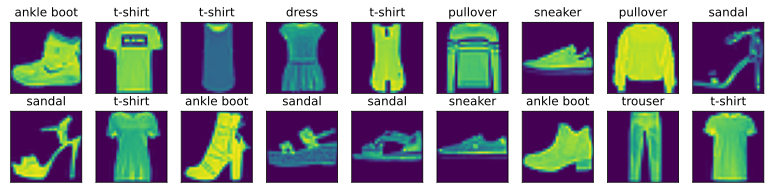

In [3]:
def get_fashion_mnist_labels(labels):
  text_labels = [
                 't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
                 'shirt', 'sneaker', 'bag', 'ankle boot'
  ]

  return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()

  for i, (ax, img) in enumerate(zip(axes, imgs)):
    ax.imshow(img.numpy())
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    if titles:
        ax.set_title(titles[i])
  return axes


# First 18 training images
X = tf.constant(mnist_train[0][:18])

# First 18 training labels
y = tf.constant(mnist_train[1][:18])

show_images(X, 2, 9, titles=get_fashion_mnist_labels(y))